<a href="https://colab.research.google.com/github/Fordalo/Data_SCIENCE_WORK/blob/main/Linearregressionproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
csvpath = '/content/gdrive/MyDrive/Colab Notebooks/Data Science projects/logisticregression/breast cancer.csv'
breastdata = pd.read_csv(csvpath)
print(breastdata.head())
print(breastdata.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

We seem to have some missing values, so lets take a look at all the columns and see how many NAN's we are dealing with

In [35]:
print(breastdata.isna().isna().sum())
print(breastdata.columns)
breastdata['Unnamed: 32']

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Unnamed: 32                0
dtype: int64
Index(['id', 'diagnosis', 'rad

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

It seems like only the last column (unnamed) has all the missing values. So we will capture some of the other variables for our Xinput.

In [36]:
xinput = breastdata[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
yinput = breastdata['diagnosis']

Now that we have our x and y inputs, I want to change our Yinput into a completely binary column with 0's and 1s. 

1 = Malignant
0 = Benign

In [44]:
yinputmod = [0 if yinput[i] == 'B' else 1 for i in range(len(yinput))]

In [45]:
yinputmod = pd.DataFrame(yinputmod)
yinputmod.value_counts()

0    357
1    212
dtype: int64

Now lets visualize how some of our attributes interact with our independent column

In [46]:
import seaborn as sns

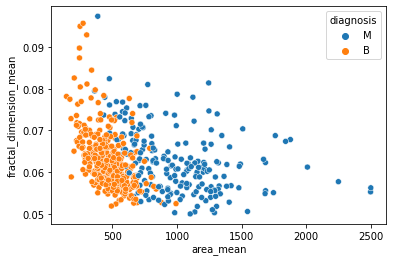

In [60]:
sns.scatterplot(x = breastdata['area_mean'], y = breastdata['fractal_dimension_mean'], data= breastdata, hue= breastdata['diagnosis'])